In [1]:
import pandas as pd
import numpy as np
import rampy
from rampy import maps
from rampy import peak_shapes
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


file='4338-NDC1-(31)_4X4.txt'

#file reading

X, Y, lambdas_one,intensities=maps.read_renishaw(file)

In [2]:
#one have to manualy estimate optimal fitting params:
#fitting range(here 0-200). Important is the vector range, not wavelength range
# aplitude, Xmean, sigma and background y0 and A(slope)
%matplotlib widget
fun=peak_shapes.create_gauss() 
amp,Xmean,sigma,y0,A=2000,2750,30,6000,0.1
plt.plot(intensities[:,1])
plt.plot(fun(lambdas_one,amp,Xmean,sigma,y0,A))
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
results,Rmap=maps.peak(X, Y, lambdas_one,intensities,'lorenz',[0,200],amp,Xmean,sigma,y0,A)

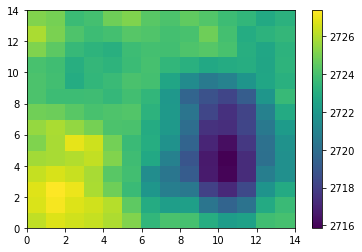

In [4]:
#while having maps in Rmap we can draw them
%matplotlib inline

heatmap = plt.pcolor(Rmap[:,:,2])
plt.colorbar(heatmap)